#  Proyecto 1

##### Gladys Andrea Rodríguez Guerrero  -  20006107

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import joblib

In [2]:
# Despliegue maximo de columnas
pd.pandas.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('dataP.csv')
print(data.shape)
data.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Se separa data para train y test
X_train, X_test, y_train, y_test = train_test_split(
                        data.drop(['SK_ID_CURR', 'TARGET'], axis=1),
                        data['TARGET'],
                        test_size=0.15,
                        random_state=2021)

X_train.shape, X_test.shape

((261384, 120), (46127, 120))

### Transformación del Target a Gausssiano

In [5]:
# No se usa np.log por datos negatvos, genera error

y_train = np.sqrt(np.power(y_train,2))
y_test = np.sqrt(np.power(y_test,2))
#y_train
#y_test

### Missing Values

##### * Missing Values para Variables Categóricas

In [6]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#cat_vars

#Agregamos variables que por definición son categóricas
cat_vars = cat_vars + ['FLAG_MOBIL'] + ['FLAG_EMP_PHONE'] + ['FLAG_WORK_PHONE'] + ['FLAG_CONT_MOBILE'] + ['FLAG_PHONE'] + ['FLAG_EMAIL']
#cat_vars

In [7]:
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

# Cantidad de variables categóricas
len(cat_vars)

22

##### * 2.1.1 Detección de NaN en variables categórias

In [8]:
cat_vars_with_na = [var for var in cat_vars 
                        if X_train[var].isnull().sum() > 0]

cat_vars_with_na

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [9]:
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending = False)

FONDKAPREMONT_MODE     0.683707
WALLSMATERIAL_MODE     0.508528
HOUSETYPE_MODE         0.501649
EMERGENCYSTATE_MODE    0.474027
OCCUPATION_TYPE        0.313171
NAME_TYPE_SUITE        0.004235
dtype: float64

In [10]:
# variables tratadas con etiqueta de faltante por cantidad masiva de faltantes.
vars_with_missing_string = [var for var in cat_vars_with_na
                               if X_train[var].isnull().mean() > 0.2]

#variables tratadas con procedimiento por candiad adecuada de faltantes.
vars_freq_category = [var for var in cat_vars_with_na
                               if X_train[var].isnull().mean() <= 0.2]

# vars_with_missing_string

#vars_freq_category

##### Aplicamos cirterio para tratar data faltante

In [11]:
#Faltantes con etiqueta missing
X_train[vars_with_missing_string] = X_train[vars_with_missing_string].fillna('Missing')
X_test[vars_with_missing_string] = X_test[vars_with_missing_string].fillna('Missing')

In [12]:
for var in vars_freq_category:
    mode = X_train[var].mode()[0]
    
    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)
    
    print(var, "-------", mode)

NAME_TYPE_SUITE ------- Unaccompanied


In [13]:
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending = False)

EMERGENCYSTATE_MODE    0.0
WALLSMATERIAL_MODE     0.0
HOUSETYPE_MODE         0.0
FONDKAPREMONT_MODE     0.0
OCCUPATION_TYPE        0.0
NAME_TYPE_SUITE        0.0
dtype: float64

In [14]:
cat_vars_with_na = [var for var in cat_vars 
                        if X_train[var].isnull().sum() > 0]
cat_vars_with_na

[]

##### * Missing Values para Variables Númericas 

In [15]:
num_vars = [var for var in X_train.columns
               if var not in cat_vars and var != 'TARGET']
len(num_vars)

98

In [16]:
# Numéricas con faltantes
num_vars_with_na = [var for var in num_vars
                       if X_train[var].isnull().sum() > 0]
num_vars_with_na

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

In [17]:
X_train[num_vars_with_na].isnull().mean()

AMT_ANNUITY                   0.000046
AMT_GOODS_PRICE               0.000907
OWN_CAR_AGE                   0.659486
CNT_FAM_MEMBERS               0.000008
EXT_SOURCE_1                  0.563761
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.134936
AMT_REQ_CREDIT_BUREAU_WEEK    0.134936
AMT_REQ_CREDIT_BUREAU_MON     0.134936
AMT_REQ_CREDIT_BUREAU_QRT     0.134936
AMT_REQ_CREDIT_BUREAU_YEAR    0.134936
Length: 61, dtype: float64

##### Aplicamos cirterio para tratar data faltante

In [18]:
for var in num_vars_with_na:
    mean_val = X_train[var].mean()
    
    print(var, mean_val)
    
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

AMT_ANNUITY 27097.09299389376
AMT_GOODS_PRICE 538278.4928258797
OWN_CAR_AGE 12.052558845008708
CNT_FAM_MEMBERS 2.15260423441553
EXT_SOURCE_1 0.5022056635928741
EXT_SOURCE_2 0.5141353498282788
EXT_SOURCE_3 0.5107135031051743
APARTMENTS_AVG 0.11751816734121442
BASEMENTAREA_AVG 0.08843796932107702
YEARS_BEGINEXPLUATATION_AVG 0.9776897407931987
YEARS_BUILD_AVG 0.7524907642075812
COMMONAREA_AVG 0.04470937507938688
ELEVATORS_AVG 0.07900563435645494
ENTRANCES_AVG 0.1498128438104283
FLOORSMAX_AVG 0.22624844690233709
FLOORSMIN_AVG 0.23189974535933727
LANDAREA_AVG 0.06631988414260871
LIVINGAPARTMENTS_AVG 0.1007022422879887
LIVINGAREA_AVG 0.10756165557928292
NONLIVINGAPARTMENTS_AVG 0.00881545422685113
NONLIVINGAREA_AVG 0.028394019005986464
APARTMENTS_MODE 0.11428902595334423
BASEMENTAREA_MODE 0.08752565898770573
YEARS_BEGINEXPLUATATION_MODE 0.9770184141330536
YEARS_BUILD_MODE 0.7596639370275575
COMMONAREA_MODE 0.04265157881366825
ELEVATORS_MODE 0.07454454417399661
ENTRANCES_MODE 0.145243005109432

In [19]:
X_train[num_vars_with_na].isnull().mean()

AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
OWN_CAR_AGE                   0.0
CNT_FAM_MEMBERS               0.0
EXT_SOURCE_1                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 61, dtype: float64

### Variables Temporales

------------- El dataset no contiene variables temporales -------------

### Transformación de Variables Numéricas

In [20]:
for var in ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE',  'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',  'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    X_train[var] = np.sqrt(np.power(X_train[var],2))
    X_test[var] = np.sqrt(np.power(X_test[var],2))

##### * Binarización de Variables con Sesgo fuerte

In [21]:
sesgadas = ['AMT_INCOME_TOTAL',  'DAYS_EMPLOYED', 'YEARS_BEGINEXPLUATATION_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON']

for var in sesgadas:
    X_train[var] = np.where(X_train[var] == 0, 0, 1)
    X_test[var] = np.where(X_test[var] == 0, 0, 1)

### Codificación de Variables Categóricas

In [22]:
# Mapeo ordinal de categorías de calidad

data_mapping = {'Cash loans':1, 'Revolving loans':0}

X_train['NAME_CONTRACT_TYPE'] = X_train['NAME_CONTRACT_TYPE'].map(data_mapping)
X_test['NAME_CONTRACT_TYPE'] = X_test['NAME_CONTRACT_TYPE'].map(data_mapping)

In [23]:
data_mapping = {'M':1, 'F':0, 'XNA':2}

X_train['CODE_GENDER'] = X_train['CODE_GENDER'].map(data_mapping)
X_test['CODE_GENDER'] = X_test['CODE_GENDER'].map(data_mapping)

In [24]:
data_mapping = {'Y':1, 'N':0}

X_train['FLAG_OWN_CAR'] = X_train['FLAG_OWN_CAR'].map(data_mapping)
X_test['FLAG_OWN_CAR'] = X_test['FLAG_OWN_CAR'].map(data_mapping)

In [25]:
data_mapping = {'Y':1, 'N':0}

X_train['FLAG_OWN_REALTY'] = X_train['FLAG_OWN_REALTY'].map(data_mapping)
X_test['FLAG_OWN_REALTY'] = X_test['FLAG_OWN_REALTY'].map(data_mapping)

In [26]:
data_mapping = {'Businessman':0, 'Unemployed':1, 'Commercial associate':2, 'Maternity leave':3, 'Pensioner':4, 'State servant':5, 'Student':6, 'Working':7}

X_train['NAME_INCOME_TYPE'] = X_train['NAME_INCOME_TYPE'].map(data_mapping)
X_test['NAME_INCOME_TYPE'] = X_test['NAME_INCOME_TYPE'].map(data_mapping)

In [27]:
data_mapping = {'Academic degree':0, 'Higher education':1, 'Incomplete higher':2, 'Lower secondary':3, 'Secondary / secondary special':4}

X_train['NAME_EDUCATION_TYPE'] = X_train['NAME_EDUCATION_TYPE'].map(data_mapping)
X_test['NAME_EDUCATION_TYPE'] = X_test['NAME_EDUCATION_TYPE'].map(data_mapping)

In [28]:
data_mapping = {'Civil marriage':0, 'Married':1, 'Separated':2, 'Single / not married':3, 'Unknown':4, 'Widow':5}

X_train['NAME_FAMILY_STATUS'] = X_train['NAME_FAMILY_STATUS'].map(data_mapping)
X_test['NAME_FAMILY_STATUS'] = X_test['NAME_FAMILY_STATUS'].map(data_mapping)

In [29]:
data_mapping = {'Co-op apartment':0, 'House / apartment':1, 'Municipal apartment':2, 'Office apartment':3, 'Rented apartment':4, 'With parents':5}

X_train['NAME_HOUSING_TYPE'] = X_train['NAME_HOUSING_TYPE'].map(data_mapping)
X_test['NAME_HOUSING_TYPE'] = X_test['NAME_HOUSING_TYPE'].map(data_mapping)

In [30]:
data_mapping = {'SUNDAY':0, 'MONDAY':1, 'TUESDAY':2, 'WEDNESDAY':3, 'THURSDAY':4, 'FRIDAY':5, 'SATURDAY':6, 'SUNDAY':7}

X_train['WEEKDAY_APPR_PROCESS_START'] = X_train['WEEKDAY_APPR_PROCESS_START'].map(data_mapping)
X_test['WEEKDAY_APPR_PROCESS_START'] = X_test['WEEKDAY_APPR_PROCESS_START'].map(data_mapping)

##### Codificación de Raras (baja frecuencia)

In [31]:
qual_vars = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']
other_cat = [var for var in cat_vars if var not in qual_vars]
other_cat

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [32]:
len(other_cat)

13

In [33]:
#funcion para encontar etiquetas raras (determinar la proporcion de rareza)
def find_rare_labels_freq(df, var, rare_perc):
    temp = df.groupby(var)[var].count()/len(df)
    return temp[temp > rare_perc].index

In [34]:
for var in other_cat:
    freqValue = find_rare_labels_freq(X_train, var, 0.01)
    
    #print(var, '--------', freqValue)
    
    X_train[var] = np.where(X_train[var].isin(freqValue), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(freqValue), X_test[var], 'Rare')

In [35]:
def replace_category_vals(train, test, y_train, var, target):
    
    temp = pd.concat([train, y_train], axis=1) 
    order_labels = temp.groupby([var])[target].mean().sort_values().index
    
    ordinal_values = {k: i for i, k in enumerate(order_labels, 0)}
    
    print(var, ordinal_values)
    
    train[var] = train[var].map(ordinal_values)
    test[var] = test[var].map(ordinal_values)

In [36]:
for var in other_cat:
    replace_category_vals(X_train, X_test, y_train, var, 'TARGET')

NAME_TYPE_SUITE {'Children': 0, 'Family': 1, 'Spouse, partner': 2, 'Unaccompanied': 3, 'Rare': 4}
OCCUPATION_TYPE {'Accountants': 0, 'High skill tech staff': 1, 'Managers': 2, 'Core staff': 3, 'Missing': 4, 'Medicine staff': 5, 'Sales staff': 6, 'Cleaning staff': 7, 'Rare': 8, 'Cooking staff': 9, 'Security staff': 10, 'Laborers': 11, 'Drivers': 12}
ORGANIZATION_TYPE {'XNA': 0, 'School': 1, 'Medicine': 2, 'Industry: type 9': 3, 'Government': 4, 'Kindergarten': 5, 'Rare': 6, 'Other': 7, 'Business Entity Type 1': 8, 'Business Entity Type 2': 9, 'Business Entity Type 3': 10, 'Trade: type 7': 11, 'Transport: type 4': 12, 'Security': 13, 'Self-employed': 14, 'Trade: type 3': 15, 'Industry: type 3': 16, 'Construction': 17}
FONDKAPREMONT_MODE {'org spec account': 0, 'reg oper spec account': 1, 'reg oper account': 2, 'not specified': 3, 'Missing': 4}
HOUSETYPE_MODE {'block of flats': 0, 'Missing': 1, 'Rare': 2}
WALLSMATERIAL_MODE {'Panel': 0, 'Rare': 1, 'Block': 2, 'Stone, brick': 3, 'Missing':

In [37]:
def analyse_other_cats(train, y_train, var):
    temp = pd.concat([train, y_train], axis=1)

    temp.groupby(var)['TARGET'].median().plot.bar()
    plt.title(var)
    plt.ylabel('TARGET')
    plt.show()

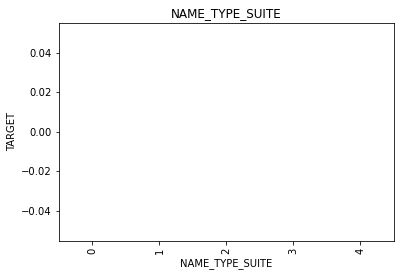

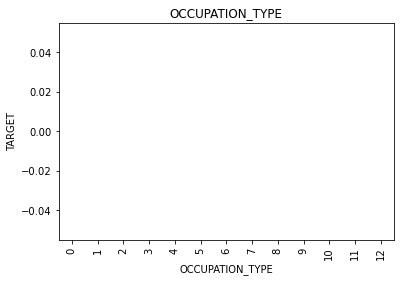

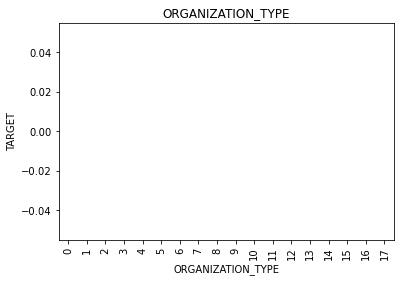

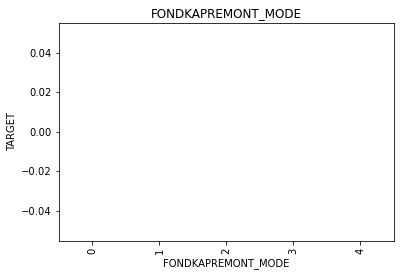

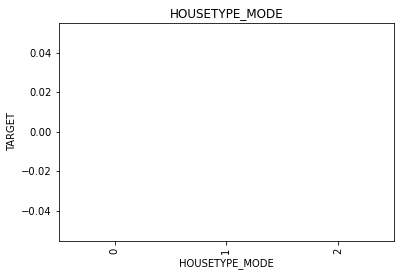

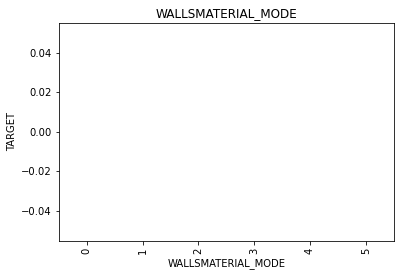

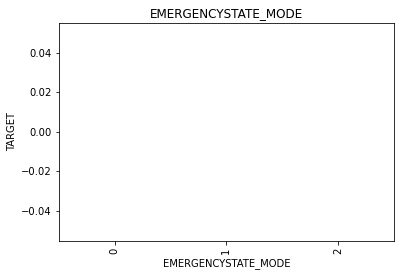

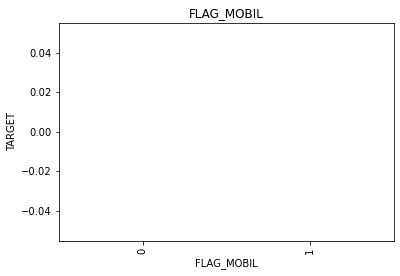

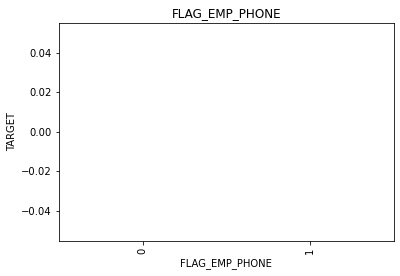

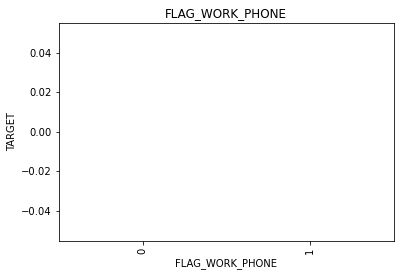

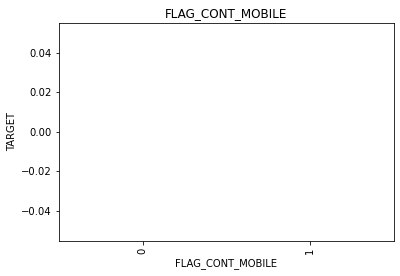

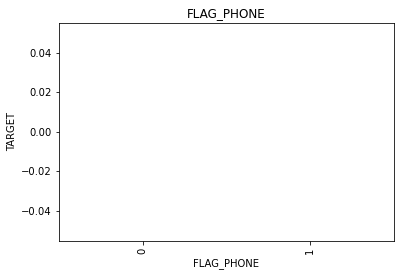

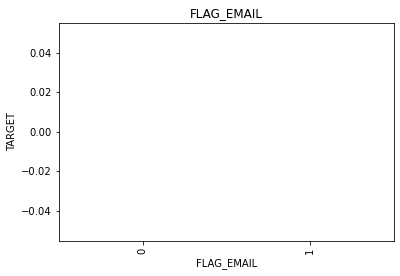

In [38]:
for var in other_cat:
    analyse_other_cats(X_train, y_train, var)

### Feature Scaling

In [39]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)


X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [40]:
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,1.0,1.0,0.000000,0.0,0.048652,0.092436,0.046016,0.75,1.000000,1.00,0.2,0.2,0.429796,0.770913,1.0,0.806055,0.747062,0.186813,1.0,1.0,0.0,1.0,1.0,1.0,0.583333,0.052632,0.5,0.5,0.166667,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,0.352941,0.487930,0.684160,0.471078,0.117518,0.088438,1.0,0.752491,0.044709,0.079006,0.149813,0.226248,0.2319,0.06632,0.100702,0.107562,1.0,0.028394,0.114289,0.087526,1.0,0.759664,0.042652,0.074545,0.145243,0.222295,0.228051,0.064958,0.105557,0.106123,1.0,0.027047,0.117909,0.087929,1.0,0.755768,0.04469,0.078128,0.149279,0.225874,0.231641,0.067175,0.101857,0.108759,1.0,0.028268,1.00,0.5,0.102633,0.8,0.5,1.0,0.000000,1.0,0.000000,0.648882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08
1,1.0,0.5,0.0,1.0,0.000000,0.0,0.256631,0.108757,0.213244,0.75,0.285714,0.25,0.2,0.2,0.421848,0.862683,1.0,0.986827,0.607693,0.132446,1.0,1.0,0.0,1.0,1.0,1.0,0.500000,0.052632,0.5,0.5,0.833333,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.882353,0.514318,0.461077,0.514756,0.082500,0.000000,1.0,0.632800,0.077800,0.000000,0.137900,0.166700,0.2083,0.02180,0.067200,0.053100,0.0,0.000000,0.084000,0.000000,1.0,0.647200,0.078500,0.000000,0.137900,0.166700,0.208300,0.022300,0.073500,0.055300,0.0,0.000000,0.083300,0.000000,1.0,0.637700,0.07830,0.000000,0.137900,0.166700,0.208300,0.022200,0.068400,0.054000,0.0,0.000000,0.50,0.0,0.042600,0.4,0.0,1.0,0.029412,1.0,0.041667,0.045666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08
2,1.0,0.0,0.0,1.0,0.000000,0.0,0.194712,0.088259,0.161616,0.75,0.571429,1.00,0.4,0.2,1.000000,0.192165,1.0,0.989178,0.297970,0.132446,1.0,0.0,0.0,1.0,1.0,1.0,0.333333,0.000000,0.0,0.0,0.500000,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.514318,0.742314,0.504763,0.439200,0

In [41]:
#Se guarda dataset con data preparada para entrenamiento.

X_train.to_csv('preprocess_data/prep_Xtrain.csv', index=False)
X_test.to_csv('preprocess_data/prep_Xtest.csv', index=False)

y_train.to_csv('preprocess_data/prep_ytrain.csv', index=False)
y_test.to_csv('preprocess_data/prep_ytest.csv', index=False)

In [42]:
joblib.dump(scaler, 'preprocess_data/minmax_scaler.joblib')

['preprocess_data/minmax_scaler.joblib']

In [43]:
np.sum(X_train[X_train == 'Unf'].sum(axis=0))

0.0